In [3]:
from tools import load
import numpy as np
import re
import math
import matplotlib.pyplot as plt

In [111]:
data = np.array(load(line_splitter=False, to_list=True))
start = np.where(data == "S")[0][0],  np.where(data == "S")[1][0]
end = np.where(data == "E")[0][0],  np.where(data == "E")[1][0]

data[data == "#"] = 0
data[data == "E"] = 1
data[data == "S"] = 1
data[data == "."] = 1

data = data.astype(bool)

In [112]:
def update_if_smaller(c,nc,cost, costs):
    cost = costs[c[0], c[1]] + cost
    if costs[nc[0], nc[1]] > cost:
        costs[nc[0], nc[1]] = cost

def calc_costs(c_d, towards): 
        if c_d == towards:
            return 1
        opt1 = (c_d == "E") and (towards == "W")
        opt2 = (c_d == "W") and (towards == "E")
        opt3 = (c_d == "S") and (towards == "N")
        opt4 = (c_d == "N") and (towards == "S")

        if opt1 or opt2 or opt3 or opt4:
            return 2001
        else: 
            return 1001


def cost_update(c,c_d, costs, board):

    if c[0] != 0:
        if board[c[0]-1, c[1]]:
            cost = calc_costs(c_d, "S")
            update_if_smaller(c,(c[0]-1,c[1]),cost, costs)
    if c[0] != (costs.shape[0]-1):
        if board[c[0]+1, c[1]]:
            cost = calc_costs(c_d, "N")
            update_if_smaller(c,(c[0]+1,c[1]),cost, costs)
    if c[1] != 0:
        if board[c[0], c[1]-1]:
            cost = calc_costs(c_d, "W")
            update_if_smaller(c,(c[0],c[1]-1),cost, costs)
    if c[1] != (costs.shape[0]+1):
        if board[c[0], c[1]+1]:
            cost = calc_costs(c_d, "E")
            update_if_smaller(c,(c[0],c[1]+1),cost, costs)


In [151]:
# Shortest path lets go. 

unvisited = np.ones(data.shape).astype(bool)

costs = np.zeros(data.shape)
costs[:,:] = np.inf
costs[start[0], start[1]] = 0

current_position = start
current_direction = "E"

In [152]:
while unvisited[end[0], end[1]]:
    cost_update(current_position, current_direction, costs, data)


    unvisited[current_position[0], current_position[1]] = False

    current_position = np.where(costs == costs[unvisited].min())
    current_position = current_position[0][0],  current_position[1][0]

(13, 1) (12, 1)
(13, 1) (13, 2)
(13, 2) (13, 1)
(13, 2) (13, 3)
(13, 3) (13, 2)
(12, 1) (11, 1)
(12, 1) (13, 1)
(11, 1) (10, 1)
(11, 1) (12, 1)
(11, 1) (11, 2)
(11, 2) (11, 1)
(11, 2) (11, 3)
(11, 3) (10, 3)
(11, 3) (11, 2)
(11, 3) (11, 4)
(11, 4) (11, 3)
(11, 4) (11, 5)
(11, 5) (10, 5)
(11, 5) (12, 5)
(11, 5) (11, 4)
(10, 1) (9, 1)
(10, 1) (11, 1)
(10, 3) (9, 3)
(10, 3) (11, 3)
(10, 5) (9, 5)
(10, 5) (11, 5)
(10, 5) (9, 5)
(10, 5) (11, 5)
(10, 5) (9, 5)
(10, 5) (11, 5)
(10, 5) (9, 5)
(10, 5) (11, 5)
(10, 5) (9, 5)
(10, 5) (11, 5)
(10, 5) (9, 5)
(10, 5) (11, 5)
(10, 5) (9, 5)
(10, 5) (11, 5)
(10, 5) (9, 5)
(10, 5) (11, 5)
(10, 5) (9, 5)
(10, 5) (11, 5)
(10, 5) (9, 5)
(10, 5) (11, 5)
(10, 5) (9, 5)
(10, 5) (11, 5)
(10, 5) (9, 5)
(10, 5) (11, 5)
(10, 5) (9, 5)
(10, 5) (11, 5)
(10, 5) (9, 5)
(10, 5) (11, 5)
(10, 5) (9, 5)
(10, 5) (11, 5)
(10, 5) (9, 5)
(10, 5) (11, 5)
(10, 5) (9, 5)
(10, 5) (11, 5)
(10, 5) (9, 5)
(10, 5) (11, 5)
(10, 5) (9, 5)
(10, 5) (11, 5)
(10, 5) (9, 5)
(10, 5) (11, 5

KeyboardInterrupt: 

In [147]:
cost_update(current_position, current_direction, costs, data)

unvisited[current_position[0], current_position[1]] = False

current_position = np.where(costs == costs[unvisited].min())
current_position = current_position[0][0],  current_position[1][0]

(13, 1) (12, 1)
(13, 1) (13, 2)


In [148]:
current_position

(13, 2)

In [140]:
(costs * unvisited)

array([[      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf

In [135]:
costs[np.]

array([[      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf

In [130]:
costs

array([[      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf,       inf,       inf,       inf,
              inf,       inf,       inf],
       [      inf,       inf,       inf,       inf

In [128]:
np.where((costs * visited) == np.nanmin(costs * visited))

<ipython-input-128-b0df09843ac9>:1: RuntimeWarning: invalid value encountered in multiply
  np.where((costs * visited) == np.nanmin(costs * visited))


(array([12, 13, 13]), array([1, 1, 2]))

In [126]:
current_position

(12, 1)

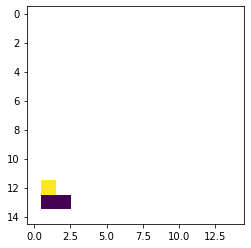

In [123]:
plt.imshow(costs)

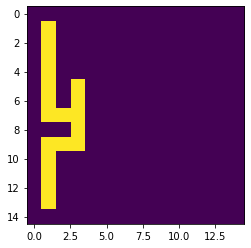

In [99]:
plt.imshow(visited)

In [15]:

data[data == "#"] = False
data[data == "S"] = True
data[data == "."] = True

array([['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-',
        '-', '-'],
       ['-', 'i', 'i', 'i', 'i', 'i', 'i', 'i', '-', 'i', 'i', 'i', 'i',
        'E', '-'],
       ['-', 'i', '-', 'i', '-', '-', '-', 'i', '-', 'i', '-', '-', '-',
        'i', '-'],
       ['-', 'i', 'i', 'i', 'i', 'i', '-', 'i', '-', 'i', 'i', 'i', '-',
        'i', '-'],
       ['-', 'i', '-', '-', '-', 'i', '-', '-', '-', '-', '-', 'i', '-',
        'i', '-'],
       ['-', 'i', '-', 'i', '-', 'i', 'i', 'i', 'i', 'i', 'i', 'i', '-',
        'i', '-'],
       ['-', 'i', '-', 'i', '-', '-', '-', '-', '-', 'i', '-', '-', '-',
        'i', '-'],
       ['-', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', '-',
        'i', '-'],
       ['-', '-', '-', 'i', '-', 'i', '-', '-', '-', '-', '-', 'i', '-',
        'i', '-'],
       ['-', 'i', 'i', 'i', '-', 'i', 'i', 'i', 'i', 'i', '-', 'i', '-',
        'i', '-'],
       ['-', 'i', '-', 'i', '-', 'i', '-', '-', '-', 'i', '-', 'i', '-',
       